# 1. Introduction

## Predict the Introverts from the Extroverts Using TensorFlow

## Objective
The objective of this project is to build a machine learning model using the TensorFlow library to predict whether a person is an introvert or extrovert based on various social and behavioral characteristics. The dataset used for this project is provided by the Kaggle competition.

## Dataset Description
The dataset contains the following columns:

- **id**: Unique identifier for each entry.
- **Time_spent_Alone**: Time the person spends alone, in hours.
- **Stage_fear**: Indicates if the person has a fear of speaking in public (yes or no).
- **Social_event_attendance**: Number of social events attended by the person.
- **Going_outside**: Number of times the person goes outside.
- **Drained_after_socializing**: Indicates if the person feels drained after socializing (yes or no).
- **Friends_circle_size**: Size of the person's circle of friends.
- **Post_frequency**: Frequency of posts on social media.
- **Personality**: The target class, indicating if the person is "Introvert" or "Extrovert".

## Notebook Structure
The notebook will be structured as follows:

1. **Importing Libraries**: We will load necessary libraries such as TensorFlow and Matplotlib.
2. **Loading Data**: We will read the CSV dataset and display a sample.
3. **Data Preprocessing**: 
   - We will check for and handle missing data.
   - Convert categorical variables to numerical format.
   - Split the data into training and validation sets.
4. **Model Building**: We will use TensorFlow's Keras API to create and compile a neural network model.
5. **Model Training**: We will train the model using the training dataset and validate its performance.
6. **Model Evaluation**: We will assess the model's performance using appropriate metrics such as accuracy, recall, and F1-score.
7. **Predictions**: We will use the trained model to make predictions on new data.

## Conclusion
By the end of this notebook, we aim to have an effective model capable of accurately predicting personality traits based on the provided features. This project will allow us to explore the TensorFlow library and apply machine learning techniques to a real-world problem.

# 2. Imports

In [1]:
%%time
# Cell 1: Import Libraries
import os  # For operating system functionalities
import pandas as pd  # For data manipulation and analysis with DataFrames
import numpy as np  # For numerical operations on arrays and matrices
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.experimental import enable_iterative_imputer  # Needed to use IterativeImputer
from sklearn.impute import IterativeImputer  # For iterative imputation of missing values
from sklearn.preprocessing import MinMaxScaler, RobustScaler  # For scaling feature values
from sklearn.decomposition import TruncatedSVD  # For dimensionality reduction
from sklearn.utils import resample  # For resampling methods
import matplotlib.pyplot as plt  # For data visualization
import tensorflow as tf  # For building and training the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2025-07-08 08:55:19.252257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751964919.522547      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751964919.597473      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


CPU times: user 12.9 s, sys: 2.22 s, total: 15.1 s
Wall time: 21.8 s


# 3. Tensor Flow Information

In [2]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.18.0
Eager execution: True


# 4. Define Preprocessing Functions - Version - 2.0
This cell defines the `preprocess` function, which is responsible for cleaning and transforming the dataset prior to model training. The function performs the following operations:

1. **Copying the DataFrame**: 
   - It creates a copy of the input DataFrame to avoid modifying the original data.

2. **Handling Missing Values**:
   - **Categorical Variables**: 
     - It fills missing values in the `Stage_fear` and `Drained_after_socializing` columns with a designated default value `'Unknown'`.
     - The categorical values (`'Yes'`, `'No'`, and `'Unknown'`) are mapped to numerical values (1, 0, -1) for ease of processing during model training.
   - **Inferring Values**: 
     - If `Stage_fear` or `Drained_after_socializing` is missing (`NaN`), it is inferred and filled as 'Yes' (or 1) based on the conditions that both `Social_event_attendance` and `Going_outside` are less than or equal to 2.

3. **Preserving Numeric Values**: 
   - The function identifies numeric columns (like `Time_spent_Alone`, `Social_event_attendance`, etc.) and handles any missing values accordingly (e.g., filling them with -1 for unknown).

4. **Calculating Additional Features**:
   - The function calculates the **Introversion Score** based on various options selected. It evaluates different scoring methodologies represented by the value of `in_ex`.

5. **Return Value**: 
   - The function returns the modified DataFrame containing completed numeric and encoded categorical values.

By preparing the dataset in this way, we ensure that it is ready for further processing and training in machine learning workflows.

In [3]:
def fill_nan(df):
    """
    Fills missing values in the DataFrame for specified columns.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing the relevant columns to fill.

    Returns:
    pd.DataFrame: The DataFrame with missing values filled.
    """
    
    # Fill missing values for Time_spent_Alone, using -1 for unknown
    df['Time_spent_Alone'] = df['Time_spent_Alone'].fillna(-1)
    
    # Fill missing values for Stage_fear and map to numerical, using -1 for unknown
    df['Stage_fear'] = df['Stage_fear'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    
    # Fill missing values for Social_event_attendance, using -1 for unknown
    df['Social_event_attendance'] = df['Social_event_attendance'].fillna(-1)
    
    # Fill missing values for Going_outside, using -1 for unknown
    df['Going_outside'] = df['Going_outside'].fillna(-1)
    
    # Fill missing values for Drained_after_socializing and map to numerical, using -1 for unknown
    df['Drained_after_socializing'] = df['Drained_after_socializing'].fillna('Unknown').map({'Yes': 1, 'No': 0, 'Unknown': -1})
    
    # Fill missing values for Friends_circle_size, using -1 for unknown
    df['Friends_circle_size'] = df['Friends_circle_size'].fillna(-1)
    
    # Fill missing values for Post_frequency, using -1 for unknown
    df['Post_frequency'] = df['Post_frequency'].fillna(-1)

    return df

def mean_to_nan(df):
    """
    Preprocess the DataFrame to fill missing values for 'Time_spent_Alone', 
    'Social_event_attendance', 'Going_outside', 'Friends_circle_size' and 'Post_frequency'.
    """
    
    # Directly setting the mean value for 'Time_spent_Alone' as 5
    mean_time_spent_alone = 5

    # Fill missing values in 'Time_spent_Alone' with the predefined mean
    df['Time_spent_Alone'] = df['Time_spent_Alone'].replace(-1, mean_time_spent_alone)

    # Directly setting the mean value for 'Social_event_attendance' as 5
    mean_social_attendance = 5

    # Fill missing values in 'Social_event_attendance' with the predefined mean
    df['Social_event_attendance'] = df['Social_event_attendance'].replace(-1, mean_social_attendance)
    
    # Directly setting the mean value for 'Going_outside' as 3
    mean_going_outside = 3

    # Fill missing values in 'Going_outside' with the predefined mean
    df['Going_outside'] = df['Going_outside'].replace(-1, mean_going_outside)

    # Directly setting the mean value for 'Friends_circle_size' as 7
    mean_friends_circle_size = 7

    # Fill missing values in 'Friends_circle_size' with the predefined mean
    df['Friends_circle_size'] = df['Friends_circle_size'].replace(-1, mean_friends_circle_size)

    # Directly setting the mean value for 'Post_frequency' as 5
    mean_post_frequency = 5

    # Fill missing values in 'Post_frequency' with the predefined mean
    df['Post_frequency'] = df['Post_frequency'].replace(-1, mean_post_frequency)

    return df

def party(df):
    """
    Preprocess the DataFrame to fill missing values for 'Stage_fear'.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing the relevant columns.
    
    Returns:
    pd.DataFrame: The processed DataFrame with filled missing values.
    """
    
    df = mean_to_nan(df)

    # Create a condition mask for rows where Stage_fear is -1
    mask = df['Stage_fear'] == -1
    mean_social_attendance = 5
    mean_going_outside = 3
    # Assign Stage_fear based on conditions using vectorized operations
    df.loc[mask & (df['Social_event_attendance'] >= mean_social_attendance) & (df['Going_outside'] >= mean_going_outside), 'Stage_fear'] = 0
    df.loc[mask & (df['Social_event_attendance'] < mean_social_attendance) & (df['Going_outside'] < mean_going_outside), 'Stage_fear'] = 1

    return df

def the_hole(df):
    """
    Preprocess the DataFrame to fill missing values for 'Drained_after_socializing'.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing the relevant columns.
    
    Returns:
    pd.DataFrame: The processed DataFrame with filled missing values.
    """

    # Create a condition mask for rows where Drained_after_socializing is -1
    mask = df['Drained_after_socializing'] == -1
    mean_social_attendance = 5
    mean_friends_circle_size = 7
    # Assign Stage_fear based on conditions using vectorized operations
    df.loc[mask & (df['Social_event_attendance'] >= mean_social_attendance) & (df['Friends_circle_size'] >= mean_friends_circle_size), 'Drained_after_socializing'] = 0
    df.loc[mask & (df['Social_event_attendance'] < mean_social_attendance) & (df['Friends_circle_size'] < mean_friends_circle_size), 'Drained_after_socializing'] = 1

    return df

def preprocess(df):

    # Make a copy of the DataFrame to avoid modifying the original data
    df = df.copy()

    # Fills missing values in the DataFrame for specified columns.
    df = fill_nan(df)

    # Preprocess the DataFrame to fill missing values for 'Going_outside', 
    df = party(df)

    # Preprocess the DataFrame to fill missing values for 'Drained_after_socializing', 
    df = the_hole(df)

    return df


# 5. Load the Datasets

In this cell, the training and testing datasets are loaded into the environment using Pandas. The following actions are performed:

1. **Loading Data**: The training dataset (`train.csv`) and the testing dataset are read from the specified file paths using `pd.read_csv()`.

2. **Data Verification**: The first few rows of each dataset are displayed using `display()` to confirm that the data has been loaded correctly. This method provides a clearer and more visually understandable format, enhancing the inspection of the structure and contents of the data.

By loading the datasets, we can then proceed to preprocess the data for feature extraction and model training.

In [4]:
# Cell 5: Load the Datasets

# Load the dataset
train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')

# Cell 6: Preprocess Training and Test Data

In this cell, we define the configuration variable `in_ex`, which determines the method used to calculate the **Introversion Score** in the preprocessing function. The available options are:

- **`es`**: Socialization Score based on the ratio of time spent going outside to time spent alone.
- **`ein`**: Normalized Introversion Score based on the ratio of time spent alone to total time (going outside + time spent alone).
- **`da`**: Absolute Difference between time spent alone and going outside, normalized by the total time.
- **`ep`**: Weighted Score, with customizable weights for time spent alone and going outside.

After defining `in_ex`, we proceed to preprocess the training and test datasets:

1. **Storing the Target Variable**: The target variable, which categorizes personalities as either Introvert (0) or Extrovert (1), is extracted from the training dataset.
2. **Removing Irrelevant Columns**: The `id` and `Personality` columns are dropped from the training features to focus on the relevant features for model training.
3. **Calling the Preprocessing Function**: The defined preprocessing function is called to clean and transform the datasets, applying the selected method for computing the **Introversion Score**.
4. **Checking Processed Features**: The first few rows of the processed training and test datasets are displayed to verify that the preprocessing has been applied correctly.

By organizing this way, we ensure a flexible and clear structure for the preprocessing of our data, setting up a robust foundation for subsequent machine learning modeling.

In [5]:
# Cell 6: Set Configuration Variable for Introversion Score Calculation

# Preprocess training data
# First, store the target variable
y = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})  # Target variable

# Now drop the 'id' and 'Personality' columns to focus on features
train_features = train.drop(['id', 'Personality'], axis=1)  # Removing 'Personality'

# Call the preprocessing function to process features including new features
X = preprocess(train_features)  

# Preprocess test data
X_test = preprocess(test.drop('id', axis=1))  # Removing 'id' before preprocessing

# Check for NaN values in the training DataFrame
if X.isnull().values.any():
    print("NaN values found in the training DataFrame:")
    display(X[X.isnull().any(axis=1)])  # Display rows with NaNs

# Check for NaN values in the test DataFrame
if X_test.isnull().values.any():
    print("NaN values found in the test DataFrame:")
    display(X_test[X_test.isnull().any(axis=1)])  # Display rows with NaNs

# (Optionally) Check the processed features using display for better readability
from IPython.display import display
display(X.head())
display(X_test.head())

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,0.0,0,6.0,4.0,0,15.0,5.0
1,1.0,0,7.0,3.0,0,10.0,8.0
2,6.0,1,1.0,0.0,1,3.0,0.0
3,3.0,0,7.0,3.0,0,11.0,5.0
4,1.0,0,4.0,4.0,0,13.0,5.0


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,0,7.0,4.0,0,6.0,5.0
1,5.0,1,0.0,0.0,1,5.0,1.0
2,3.0,0,5.0,6.0,0,15.0,9.0
3,3.0,0,4.0,4.0,0,5.0,6.0
4,9.0,1,1.0,2.0,1,1.0,1.0


In [6]:
# Adjustable parameters
BATCH_SIZE = 32  # Increased batch size to stabilize training and leverage better GPU utilization
EPOCHS = 50  # Increased number of epochs for more training iterations to learn complex patterns
DROPOUT_RATE = 0.4  # Slightly increased dropout rate for regularization to help with overfitting
HIDDEN_UNITS_1 = 64  # Increased the number of neurons in the first hidden layer to allow the model to learn more complex features
HIDDEN_UNITS_2 = 128  # Increased the number of neurons in the second hidden layer for added complexity
HIDDEN_UNITS_3 = 256 # Increased the number of neurons in the third hidden layer for added complexity
VALIDATION_SPLIT = 0.2  # Keeps the same validation split for assessing performance


# Scale the training data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Fit to training data (includes new features)
X_test_scaled = scaler.transform(X_test)  # Transform the test data with the same scaler

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y.values, test_size=VALIDATION_SPLIT, random_state=42)

# Create TensorFlow Dataset for the training and validation sets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)

# Model definition with Dropout for regularization
input_shape = X_scaled.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape,)),
    tf.keras.layers.Dense(HIDDEN_UNITS_1, activation='relu'),
    tf.keras.layers.Dropout(DROPOUT_RATE),  
    # tf.keras.layers.Dense(HIDDEN_UNITS_2, activation='relu'),
    # tf.keras.layers.Dropout(DROPOUT_RATE),
    # tf.keras.layers.Dense(HIDDEN_UNITS_3, activation='relu'),
    # tf.keras.layers.Dropout(DROPOUT_RATE),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Train the model with validation
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset)

# Make predictions on the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices(X_test_scaled).batch(BATCH_SIZE)  # No labels for test set
predictions = model.predict(test_dataset)
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to class labels


Epoch 1/50


2025-07-08 08:55:34.998266: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8173 - loss: 0.3914 - val_accuracy: 0.9684 - val_loss: 0.1425
Epoch 2/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1565 - val_accuracy: 0.9684 - val_loss: 0.1415
Epoch 3/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9649 - loss: 0.1580 - val_accuracy: 0.9684 - val_loss: 0.1410
Epoch 4/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9664 - loss: 0.1544 - val_accuracy: 0.9684 - val_loss: 0.1408
Epoch 5/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.1548 - val_accuracy: 0.9684 - val_loss: 0.1404
Epoch 6/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.1525 - val_accuracy: 0.9684 - val_loss: 0.1402
Epoch 7/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.1538 - val_accuracy: 0.9684 - val_loss: 0.1399
Epoch 8/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.1539 - val_accuracy: 0.9684 - val_

# Cell 7: Visualize Training History

In this cell, we define the `plot_training_history` function to visualize the training progress of the model over epochs. This visualization will help in understanding how the model's performance evolves during training.

### Key Components:

1. **Function Definition**: 
   - The `plot_training_history` function takes in the training history object from `model.fit()` as an argument.

2. **Loss Visualization**: 
   - The first subplot displays the training loss across epochs. Monitoring the loss helps determine if the model is learning effectively.

3. **Accuracy Visualization**:
   - The second subplot presents the training accuracy over epochs. This information is crucial for evaluating how well the model predicts the target classes.

4. **Subplots**:
   - Both loss and accuracy are plotted on the same figure, allowing for easy comparison of how changes in loss relate to accuracy improvements.

5. **Display**: 
   - The function uses `plt.show()` to render the plots, aiding in visual assessment of the model's performance.

This step is critical for identifying potential issues such as overfitting or underfitting in the training process.

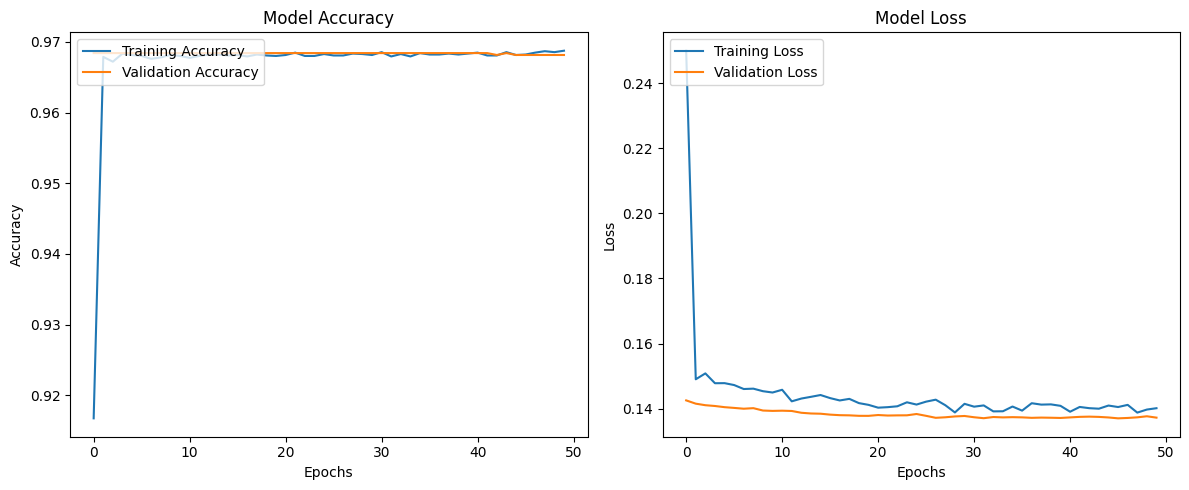

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Make predictions on the test dataset continues as is...

In [8]:
# Convert probabilities to class labels
predicted_classes = (predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary class labels

# Display the first few predicted classes
print("Sample Predictions from Test Data (first 5):", predicted_classes[:5])

# Optional: Save Predictions to a CSV File
output_df = pd.DataFrame({'id': test['id'], 'Personality': predicted_classes})
output_df['Personality'] = output_df['Personality'].map({0: 'Introvert', 1: 'Extrovert'})  # Map back to original labels

# Save to CSV file
output_df.to_csv('submission.csv', index=False)  # Save the predictions for submission or review

Sample Predictions from Test Data (first 5): [1 0 1 1 0]


193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step


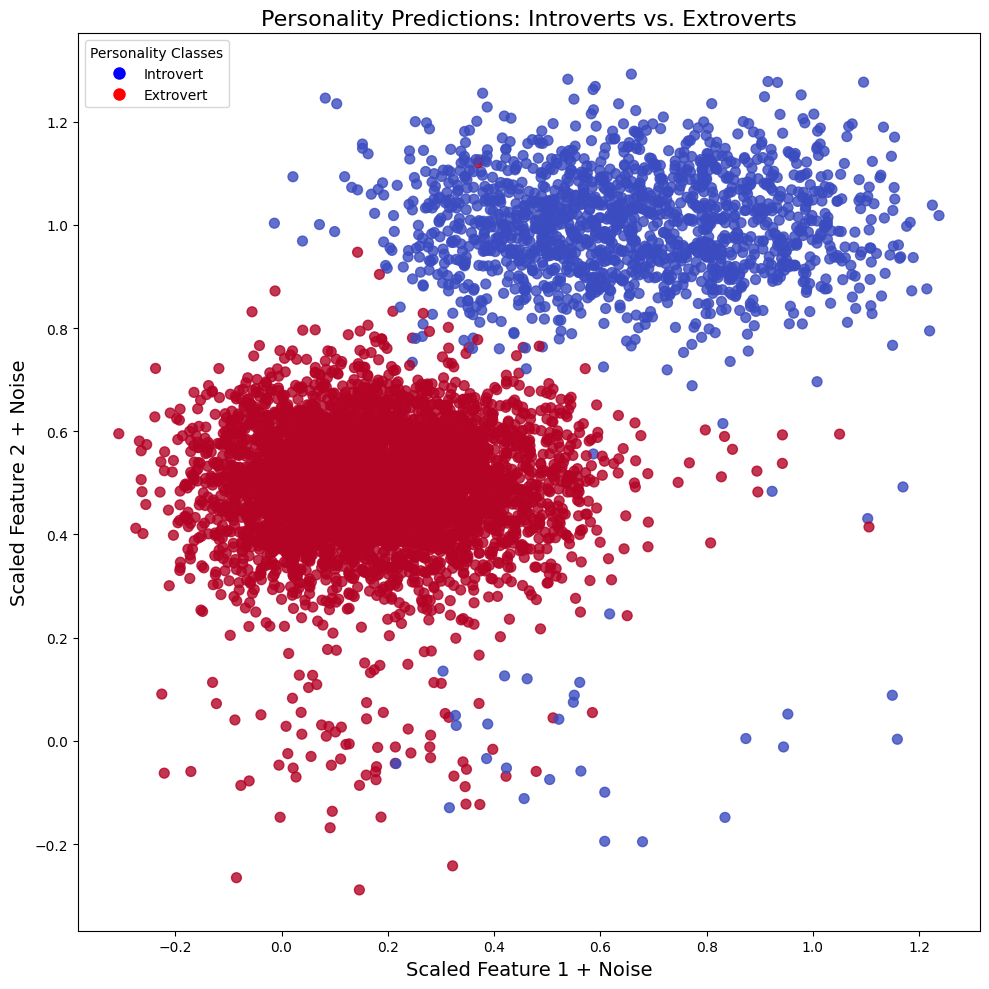

In [9]:
# Cell 9: Visualize Predictions
# Predict the probabilities for the test data
predictions = model.predict(test_dataset)  # This should give you the prediction probabilities
predicted_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary class labels

# Prepare to visualize the first two features from the scaled test dataset
# Adding noise to the features to disperse the points
noise_scale = 0.1  # Adjust this for better spacing in the visualization

plt.figure(figsize=(10, 10))
plt.scatter(X_test_scaled[:, 0] + np.random.normal(0, noise_scale, size=len(X_test_scaled)), 
            X_test_scaled[:, 1] + np.random.normal(0, noise_scale, size=len(X_test_scaled)),
            c=predicted_classes.flatten(),  # Color based on predictions
            cmap='coolwarm', alpha=0.8, s=50, marker='o')

# Title and labels
plt.title("Personality Predictions: Introverts vs. Extroverts", fontsize=16)
plt.xlabel("Scaled Feature 1 + Noise", fontsize=14)  # Adjust the feature label as needed
plt.ylabel("Scaled Feature 2 + Noise", fontsize=14)  # Adjust the feature label as needed

# Custom legend for Introverts and Extroverts
introvert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Introvert',
                              markerfacecolor='blue', markersize=10)  
extrovert_patch = plt.Line2D([0], [0], marker='o', color='w', label='Extrovert',
                              markerfacecolor='red', markersize=10)  

# Adding the custom legend
plt.legend(handles=[introvert_patch, extrovert_patch], title="Personality Classes")
plt.tight_layout()
plt.show()